In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/full/exp/csv/february.csv')
df2 = pd.read_csv('./data/full/exp/csv/march.csv')
df3 = pd.read_csv('./data/full/exp/csv/august.csv')
df4 = pd.read_csv('./data/full/exp/csv/september.csv')
df5 = pd.read_csv('./data/full/exp/csv/october.csv')

In [4]:
df.head()

,year,month,day,hour,minute,n_cluster,lon,lat,ind_x,ind_y,reflect,yyyyy_xx1,yyyyy_xx2,yyyyyyy_xx3,yyy_xx4,yyy_xx5,river,cxe,precipit,vil
0,2014.0,2.0,16.0,19.0,36.0,32.0,-59.6314,-3.8289,138.0,154.0,22.1094,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.5927,0.4738
1,2014.0,2.0,16.0,19.0,36.0,32.0,-59.6114,-3.8289,139.0,154.0,20.4531,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.2287,0.3705
2,2014.0,2.0,16.0,19.0,36.0,32.0,-59.6314,-3.8489,138.0,155.0,21.0781,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.3551,0.4079
3,2014.0,2.0,16.0,19.0,36.0,32.0,-59.6114,-3.8489,139.0,155.0,22.4844,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.6890,0.4360
4,2014.0,2.0,16.0,19.0,36.0,32.0,-59.5914,-3.8489,140.0,155.0,20.9375,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.3256,0.4214


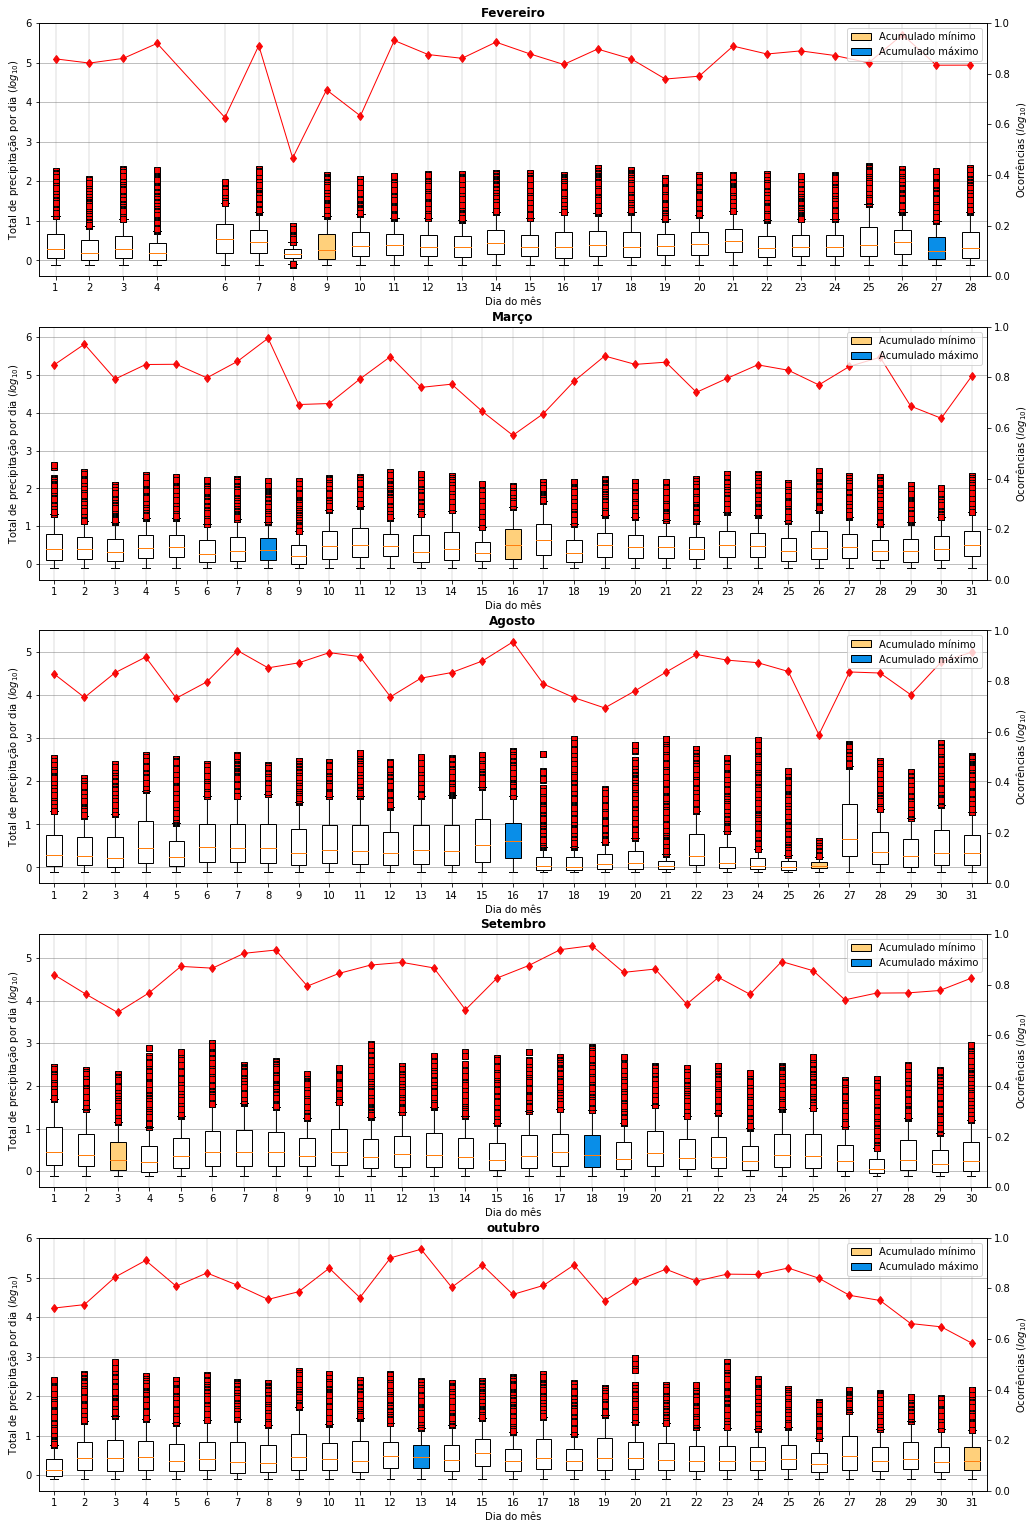

In [5]:
def plot_precipitation(df, df2, df3, df4, df5, title=''):
    #df
    # define marker style
    red_square = dict(markerfacecolor='r', marker='s')
    font = {'family': 'sans-serif',
        'color':  'black',
        'fontweight': 'semibold',
    }

    #define plot layout
    fig = plt.figure(figsize=(17, 27))
    ax = fig.add_subplot(511)

    #define max and min values for apply highlight
    temp = df[df['day'] == 1]['precipit'].values.ravel()
    minv, maxv = (0, np.sum(temp)), (0, np.sum(temp))
    precipit, days, count = [], [], []
    
    for x in range(31):
        #get rows of current day
        temp = df[df['day'] == x+1]['precipit'].values.ravel()
        
        #maybe there are days that didn't have measurements
        if not len(temp):
            continue
            
        #obtaining precipitation values and quantity of
        # measurements in the logarithmic base
        precipit.append(np.log10(temp))
        count.append(np.log10(len(temp)))
        days.append(x+1)

        #updating variables with max and min precipitation values
        amount = np.sum(temp)
        minv = (x, amount) if amount < minv[1] else minv
        maxv = (x, amount) if amount > maxv[1] else maxv

    #
    bplot = ax.boxplot(precipit, flierprops=red_square,  \
                       patch_artist=True, vert=True, whis=0.75, positions=days)
    ax.set_title(title, fontdict=font)
    ax.plot(days, count, 'r', marker='d', linewidth=1)
    ax.set_ylabel('Total de precipitação por dia $(log_{10})$')
    ax.set_xlabel('Dia do mês')
    ax.grid(b=True, axis='y', which='major')

    colors = ['#FFFFFF' for x in days]

    for x, patch in enumerate(bplot['boxes']):
        if x == minv[0]:
            patch.set_facecolor('#FFD07B')
        elif x == maxv[0]:
            patch.set_facecolor('#098EE8')
        else:
            patch.set_facecolor('#FFFFFF')

    for x in days:
        ax.axvline(x=x, color='gray', alpha=.175)

    ax.legend([bplot['boxes'][minv[0]], \
                  bplot['boxes'][maxv[0]]], \
                 ['Acumulado mínimo', 'Acumulado máximo'], loc='upper right')

    rowsprecipit = ax.twinx()
    rowsprecipit.set_ylabel('Ocorrências $(log_{10})$')
    ax.set_title('Fevereiro', fontdict=font)
    
    #---df2
    df = df2
    ax = fig.add_subplot(512)

    #define max and min values for apply highlight
    temp = df[df['day'] == 1]['precipit'].values.ravel()
    minv, maxv = (0, np.sum(temp)), (0, np.sum(temp))
    precipit, days, count = [], [], []
    
    for x in range(31):
        #get rows of current day
        temp = df[df['day'] == x+1]['precipit'].values.ravel()
        
        #maybe there are days that didn't have measurements
        if not len(temp):
            continue
            
        #obtaining precipitation values and quantity of
        # measurements in the logarithmic base
        precipit.append(np.log10(temp))
        count.append(np.log10(len(temp)))
        days.append(x+1)

        #updating variables with max and min precipitation values
        amount = np.sum(temp)
        minv = (x, amount) if amount < minv[1] else minv
        maxv = (x, amount) if amount > maxv[1] else maxv

    #
    bplot = ax.boxplot(precipit, flierprops=red_square,  \
                       patch_artist=True, vert=True, whis=0.75, positions=days)
    ax.set_title(title, fontdict=font)
    ax.plot(days, count, 'r', marker='d', linewidth=1)
    ax.set_ylabel('Total de precipitação por dia $(log_{10})$')
    ax.set_xlabel('Dia do mês')
    ax.grid(b=True, axis='y', which='major')

    colors = ['#FFFFFF' for x in days]

    for x, patch in enumerate(bplot['boxes']):
        if x == minv[0]:
            patch.set_facecolor('#FFD07B')
        elif x == maxv[0]:
            patch.set_facecolor('#098EE8')
        else:
            patch.set_facecolor('#FFFFFF')

    for x in days:
        ax.axvline(x=x, color='gray', alpha=.175)

    ax.legend([bplot['boxes'][minv[0]], \
                  bplot['boxes'][maxv[0]]], \
                 ['Acumulado mínimo', 'Acumulado máximo'], loc='upper right')

    rowsprecipit = ax.twinx()
    rowsprecipit.set_ylabel('Ocorrências $(log_{10})$')
    ax.set_title('Março', fontdict=font)
    
    #----df3
    df = df3
    ax = fig.add_subplot(513)

    #define max and min values for apply highlight
    temp = df[df['day'] == 1]['precipit'].values.ravel()
    minv, maxv = (0, np.sum(temp)), (0, np.sum(temp))
    precipit, days, count = [], [], []
    
    for x in range(31):
        #get rows of current day
        temp = df[df['day'] == x+1]['precipit'].values.ravel()
        
        #maybe there are days that didn't have measurements
        if not len(temp):
            continue
            
        #obtaining precipitation values and quantity of
        # measurements in the logarithmic base
        precipit.append(np.log10(temp))
        count.append(np.log10(len(temp)))
        days.append(x+1)

        #updating variables with max and min precipitation values
        amount = np.sum(temp)
        minv = (x, amount) if amount < minv[1] else minv
        maxv = (x, amount) if amount > maxv[1] else maxv

    #
    bplot = ax.boxplot(precipit, flierprops=red_square,  \
                       patch_artist=True, vert=True, whis=0.75, positions=days)
    ax.set_title(title, fontdict=font)
    ax.plot(days, count, 'r', marker='d', linewidth=1)
    ax.set_ylabel('Total de precipitação por dia $(log_{10})$')
    ax.set_xlabel('Dia do mês')
    ax.grid(b=True, axis='y', which='major')

    colors = ['#FFFFFF' for x in days]

    for x, patch in enumerate(bplot['boxes']):
        if x == minv[0]:
            patch.set_facecolor('#FFD07B')
        elif x == maxv[0]:
            patch.set_facecolor('#098EE8')
        else:
            patch.set_facecolor('#FFFFFF')

    for x in days:
        ax.axvline(x=x, color='gray', alpha=.175)

    ax.legend([bplot['boxes'][minv[0]], \
                  bplot['boxes'][maxv[0]]], \
                 ['Acumulado mínimo', 'Acumulado máximo'], loc='upper right')

    rowsprecipit = ax.twinx()
    rowsprecipit.set_ylabel('Ocorrências $(log_{10})$')
    ax.set_title('Agosto', fontdict=font)
    
    #----df4    
    df = df4
    ax = fig.add_subplot(514)

    #define max and min values for apply highlight
    temp = df[df['day'] == 1]['precipit'].values.ravel()
    minv, maxv = (0, np.sum(temp)), (0, np.sum(temp))
    precipit, days, count = [], [], []
    
    for x in range(31):
        #get rows of current day
        temp = df[df['day'] == x+1]['precipit'].values.ravel()
        
        #maybe there are days that didn't have measurements
        if not len(temp):
            continue
            
        #obtaining precipitation values and quantity of
        # measurements in the logarithmic base
        precipit.append(np.log10(temp))
        count.append(np.log10(len(temp)))
        days.append(x+1)

        #updating variables with max and min precipitation values
        amount = np.sum(temp)
        minv = (x, amount) if amount < minv[1] else minv
        maxv = (x, amount) if amount > maxv[1] else maxv

    #
    bplot = ax.boxplot(precipit, flierprops=red_square,  \
                       patch_artist=True, vert=True, whis=0.75, positions=days)
    ax.set_title(title, fontdict=font)
    ax.plot(days, count, 'r', marker='d', linewidth=1)
    ax.set_ylabel('Total de precipitação por dia $(log_{10})$')
    ax.set_xlabel('Dia do mês')
    ax.grid(b=True, axis='y', which='major')

    colors = ['#FFFFFF' for x in days]

    for x, patch in enumerate(bplot['boxes']):
        if x == minv[0]:
            patch.set_facecolor('#FFD07B')
        elif x == maxv[0]:
            patch.set_facecolor('#098EE8')
        else:
            patch.set_facecolor('#FFFFFF')

    for x in days:
        ax.axvline(x=x, color='gray', alpha=.175)

    ax.legend([bplot['boxes'][minv[0]], \
                  bplot['boxes'][maxv[0]]], \
                 ['Acumulado mínimo', 'Acumulado máximo'], loc='upper right')

    rowsprecipit = ax.twinx()
    rowsprecipit.set_ylabel('Ocorrências $(log_{10})$')
    ax.set_title('Setembro', fontdict=font)
    
    #----df5
    df = df5
    ax = fig.add_subplot(515)

    #define max and min values for apply highlight
    temp = df[df['day'] == 1]['precipit'].values.ravel()
    minv, maxv = (0, np.sum(temp)), (0, np.sum(temp))
    precipit, days, count = [], [], []
    
    for x in range(31):
        #get rows of current day
        temp = df[df['day'] == x+1]['precipit'].values.ravel()
        
        #maybe there are days that didn't have measurements
        if not len(temp):
            continue
            
        #obtaining precipitation values and quantity of
        # measurements in the logarithmic base
        precipit.append(np.log10(temp))
        count.append(np.log10(len(temp)))
        days.append(x+1)

        #updating variables with max and min precipitation values
        amount = np.sum(temp)
        minv = (x, amount) if amount < minv[1] else minv
        maxv = (x, amount) if amount > maxv[1] else maxv

    #
    bplot = ax.boxplot(precipit, flierprops=red_square,  \
                       patch_artist=True, vert=True, whis=0.75, positions=days)
    ax.set_title(title, fontdict=font)
    ax.plot(days, count, 'r', marker='d', linewidth=1)
    ax.set_ylabel('Total de precipitação por dia $(log_{10})$')
    ax.set_xlabel('Dia do mês')
    ax.grid(b=True, axis='y', which='major')

    colors = ['#FFFFFF' for x in days]

    for x, patch in enumerate(bplot['boxes']):
        if x == minv[0]:
            patch.set_facecolor('#FFD07B')
        elif x == maxv[0]:
            patch.set_facecolor('#098EE8')
        else:
            patch.set_facecolor('#FFFFFF')

    for x in days:
        ax.axvline(x=x, color='gray', alpha=.175)

    ax.legend([bplot['boxes'][minv[0]], \
                  bplot['boxes'][maxv[0]]], \
                 ['Acumulado mínimo', 'Acumulado máximo'], loc='upper right')

    rowsprecipit = ax.twinx()
    rowsprecipit.set_ylabel('Ocorrências $(log_{10})$')
    ax.set_title('outubro', fontdict=font)
    
#     plt.savefig('precipit_year.png', bbox_inches='tight', transparent="True", pad_inches=0)
    plt.savefig('precipit_year.png', bbox_inches='tight', transparent="False", pad_inches=0)
    plt.show()
plot_precipitation(df, df2, df3, df4, df5)

In [6]:
def plot_precipitation(df, title=''):
    # define marker style
    red_square = dict(markerfacecolor='r', marker='s')
    font = {'family': 'sans-serif',
        'color':  'black',
        'fontweight': 'semibold',
    }

    #define plot layout
    fig = plt.figure(figsize=(17, 15))Fevereiro
    ax = fig.add_subplot(511)

    #define max and min values for apply highlight
    temp = df[df['day'] == 1]['precipit'].values.ravel()
    minv, maxv = (0, np.sum(temp)), (0, np.sum(temp))
    precipit, days, count = [], [], []
    starnet1, starnet2 = [], []
    old, linet1, linet2 = [], [], []
    
    for x in range(31):
        #get rows of current day
        temp = df[df['day'] == x+1]['precipit'].values.ravel()
        
        #maybe there are days that didn't have measurements
        if not len(temp):
            continue
        
        s1 = np.sum(df[df['day'] == x+1]['yyyyy_xx1'].values.ravel())
        s2 = np.sum(df[df['day'] == x+1]['yyyyy_xx2'].values.ravel())
        ol = np.sum(df[df['day'] == x+1]['yyyyyyy_xx3'].values.ravel())
        l1 = np.sum(df[df['day'] == x+1]['yyy_xx4'].values.ravel())
        l2 = np.sum(df[df['day'] == x+1]['yyy_xx5'].values.ravel())
        s1 = s1 = 0 if not s1 else np.log10(s1)
        s2 = s2 = 0 if not s1 else np.log10(s2)
        ol = ol = 0 if not s1 else np.log10(ol)
        l1 = l1 = 0 if not s1 else np.log10(l1)
        l2 = l2 = 0 if not s1 else np.log10(l2)
        
        starnet1.append(s1); starnet2.append(s2); 
        old.append(ol); linet1.append(l1); linet2.append(l2)
        
        
        #obtaining precipitation values and quantity of
        # measurements in the logarithmic base
        precipit.append(np.log10(temp))
        count.append(np.log10(len(temp)))
        days.append(x+1)

        #updating variables with max and min precipitation values
        amount = np.sum(temp)
        minv = (x, amount) if amount < minv[1] else minv
        maxv = (x, amount) if amount > maxv[1] else maxv

    #
    bplot = ax.boxplot(precipit, flierprops=red_square,  \
                       patch_artist=True, vert=True, whis=0.75, positions=days)
    ax.set_title(title, fontdict=font)
    ax.plot(days, count, 'r', marker='d', linewidth=1)
    ax.set_ylabel('Total de precipitação por dia $(log_{10})$')
    ax.set_xlabel('Dia do mês')
    ax.grid(b=True, axis='y', which='major')

    colors = ['#FFFFFF' for x in days]

    for x, patch in enumerate(bplot['boxes']):
        if x == minv[0]:
            patch.set_facecolor('#FFD07B')
        elif x == maxv[0]:
            patch.set_facecolor('#098EE8')
        else:
            patch.set_facecolor('#FFFFFF')

    for x in days:
        ax.axvline(x=x, color='gray', alpha=.175)

    ax.legend([bplot['boxes'][minv[0]], \
                  bplot['boxes'][maxv[0]]], \
                 ['Acumulado mínimo', 'Acumulado máximo'], loc='upper right')

    rowsprecipit = ax.twinx()
    rowsprecipit.set_ylabel('Ocorrências $(log_{10})$')
    
    ax = fig.add_subplot(212)
    ax.plot(days, starnet1, 'red', marker='o', linestyle='--', label='STARNET -')
    ax.plot(days, starnet2, 'green', marker='o', label='STARNET +')
    ax.plot(days, old, 'blue', marker='o', label='OLD360')
    ax.plot(days, linet1, 'red', marker='o', label='LINET -')
    ax.plot(days, linet2, 'green', marker='o', label='LINET +')
    

    ltemp = ['Dia {}'.format(x+1) for x in np.arange(30)]
#     plt.savefig('../images/results/total.png', dpi=300)
    plt.show()
plot_precipitation(df)

SyntaxError: invalid syntax (<ipython-input-6-4fc18c52c2ac>, line 10)

In [ ]:
# !conda install -c conda-forge -y obspy
# !pip install scaleogram

In [ ]:
ag = df.groupby('day').agg({'precipit': ['sum']})
days = ag.index.ravel()
prec = ag.values.ravel()
# scale = np.logspace(1.2, 3.1, num=200, dtype=np.int32)
scale = np.arange(1, len(prec))
ax = scg.cws(days, prec, scales=scale, figsize=(16,6), title='Precipitação em fevereiro'\
             , ylabel="Period [Dias]", xlabel='Dia do Mês', yscale='log')
plt.savefig('./images/results/scaleogram-february.png')
plt.plot()

In [ ]:
ag = df2.groupby('day').agg({'precipit': ['sum']})
days = ag.index.ravel()
prec = ag.values.ravel()
# scale = np.logspace(1.2, 3.1, num=200, dtype=np.int32)
scale = np.arange(1, len(prec))
ax = scg.cws(days, prec, scales=scale, figsize=(16,6), title='Precipitação em Março'\
             , ylabel="Period [Dias]", xlabel='Dia do Mês', yscale='log')
plt.plot()

[]

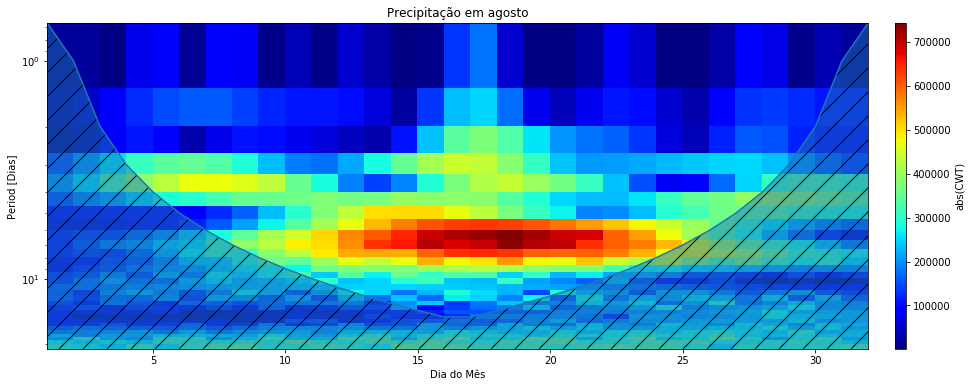

In [206]:
ag = df3.groupby('day').agg({'precipit': ['sum']})
days = ag.index.ravel()
prec = ag.values.ravel()
# scale = np.logspace(1.2, 3.1, num=200, dtype=np.int32)
scale = np.arange(1, len(prec))
ax = scg.cws(days, prec, scales=scale, figsize=(16,6), title='Precipitação em agosto'\
             , ylabel="Period [Dias]", xlabel='Dia do Mês', yscale='log')
plt.plot()

[]

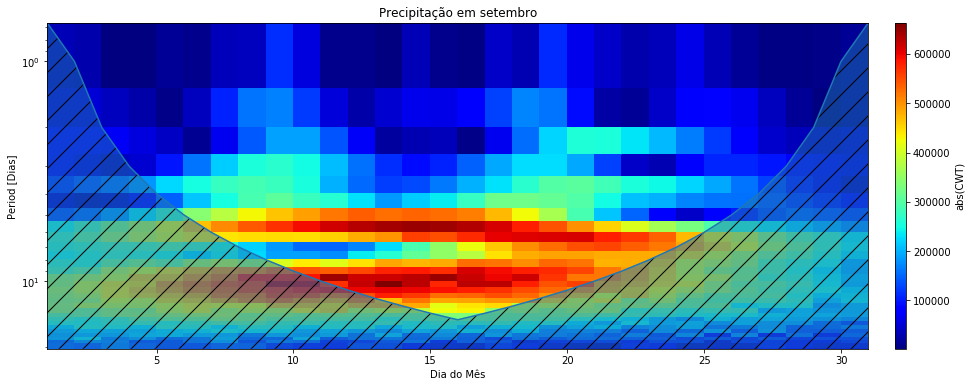

In [208]:
ag = df4.groupby('day').agg({'precipit': ['sum']})
days = ag.index.ravel()
prec = ag.values.ravel()
# scale = np.logspace(1.2, 3.1, num=200, dtype=np.int32)
scale = np.arange(1, len(prec))
ax = scg.cws(days, prec, scales=scale, figsize=(16,6), title='Precipitação em setembro'\
             , ylabel="Period [Dias]", xlabel='Dia do Mês', yscale='log')
plt.plot()

[]

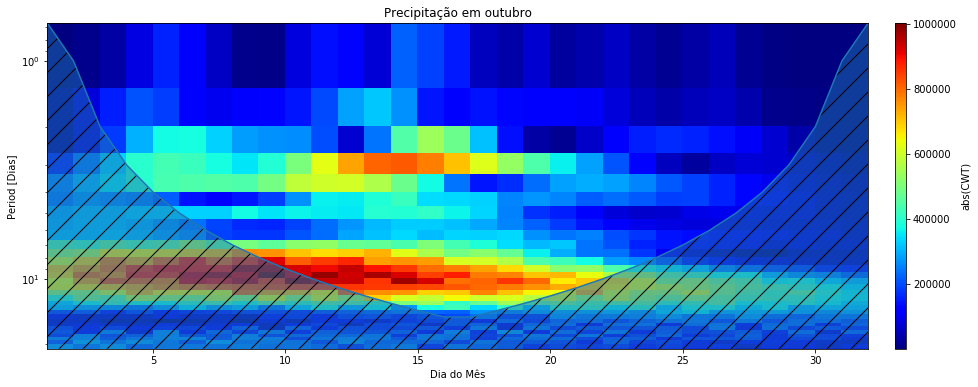

In [209]:
ag = df5.groupby('day').agg({'precipit': ['sum']})
days = ag.index.ravel()
prec = ag.values.ravel()
# scale = np.logspace(1.2, 3.1, num=200, dtype=np.int32)
scale = np.arange(1, len(prec))
ax = scg.cws(days, prec, scales=scale, figsize=(16,6), title='Precipitação em outubro'\
             , ylabel="Period [Dias]", xlabel='Dia do Mês', yscale='log')
plt.plot()